In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

import numpy as np
import matplotlib.pyplot as plt
import dfa_functions as dfaf

***

### Method Description

The Progressive Detrended Fluctuation Analysis (PDFA) is a technique based on the traditional Detrended Fluctuation Analysis (DFA) to detect changing points of the statistics or the types of correlation of a given time series. 

The DFA method was built to analyze long-range correlation in time series, using the entire time series and, therefore, assuming that its statistics and the type of correlation does not change during the considered time interval. In contrast to DFA, the PDFA method will analyze partial sums of length $p$ ($p = 1, \ldots, N$) separately. Each partial sum is divided into non-overlapping windows of length $n$, where $n$ is fixed, and the local trends are eliminated in each window, and a fluctuation $P_{[n]}(p)$ is calculated for each partial sum.

Plotting $P_{[n]}(p)\; vs \; p$ will result in a curve that responds to abrupt changes of statistics or the type of correlations.

A more detailed explanation about the mechanism of change-point detection and applications to heart rate series can be found at [1].

__[1] Staudacher, M., et al. "A new method for change-point detection developed for on-line analysis of the heart beat variability during sleep." Physica A: Statistical Mechanics and its Applications 349.3-4 (2005): 582-596.__

##### Algorithm

Given a time series $\{x_i\}_{i = 1}^{N}$ of size $N$,

- Calculate the series profile

$$
y(k) = \sum_{i = 1}^{k}(x_i - \overline{x}), \; k = 1, \ldots, N
$$

- Start a loop from $i = 2$ to $i = N$ to progressively increase the size of the series that will be analyzed (denoted by $w_i$).
    - Select $w_i = y[1: i+1]$
    - Define boxes of size $n$ (fixed) inside $w_i$. The last box can have a different size. Compute a polynomial approximation inside each box and then the fluctuation
    
$$
P_{(n)}(k) = \sqrt{\sum_{i = 1}^{k}(w_{k}(i) - p_{n}(i))^2}
$$




### Testing with artificial data

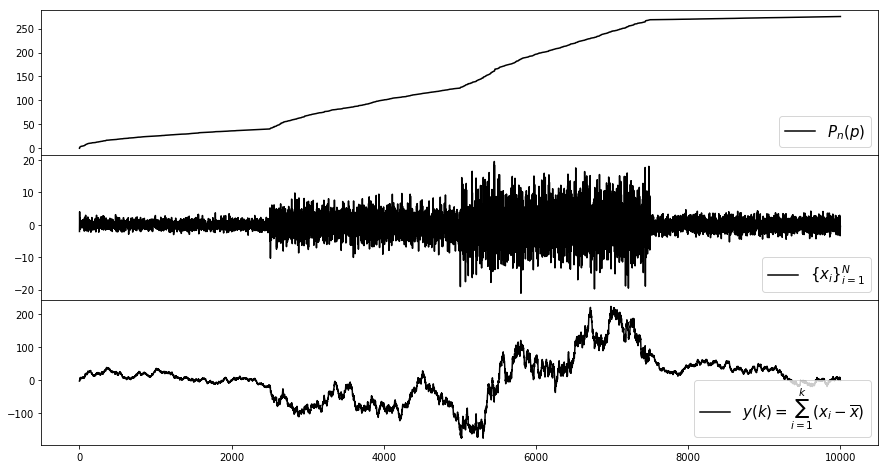

In [5]:
# Creates an artificial series devided into 4 sections with different variance
s = 2500
series = np.concatenate((np.random.normal(size = s), np.random.normal(scale = 3, size = s),
                         np.random.normal(scale = 6, size = s), np.random.normal(scale = 1.5, size = s)))
profile = np.cumsum(series - np.mean(series))


# Apply the PDFA algorithm with n = 10 and fittin a linear curve in each window
P = dfaf.PDFA(series, 10, 1)

# Plot
fig, ax = plt.subplots(ncols = 1, nrows = 3)
ax[0].set_xticks([])
ax[1].set_xticks([])
fig.set_size_inches(15, 8)
fig.subplots_adjust(hspace = 0)

ax[0].plot(np.arange(len(P)), P, 'k', label = r'$P_{n}(p)$')
ax[1].plot(np.arange(len(series)), series, 'k', label = r'$\{x_i\}_{i = 1}^N$')
ax[2].plot(np.arange(len(profile)), profile, 'k', label = r'$y(k) = \sum_{i = 1}^{k}(x_i - \overline{x})$')

for i in range(3):
    ax[i].legend(fontsize = 15, markerscale = 7, loc = 4)